# Numerische Optimierungsverfahren – Zweidimensional

In [123]:
# Pakete laden
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.optimize import minimize

## Definition verschiedener Zielfunktionen

In [124]:
# Funktion 1 und ihr Gradient
def f1(x):
    return (x[0] - 2)**2 + (x[1] - 5)**2 - 3*np.cos(x[1])

def grad_f1(x):
    dfdx0 = 2 * (x[0] - 2)  # Ableitung nach x[0]
    dfdx1 = 2 * (x[1] - 5) + 3 * np.sin(x[1])  # Ableitung nach x[1]
    return np.array([dfdx0, dfdx1])

# Funktion 2 und ihr Gradient

a=1
b=100

def f2(x):
    return (a-x[0])**2+b*(x[1]-x[0]**2)**2

 
def grad_f2(x):
    dfdx0 =  2*(x[0]-a) - 4*b*x[0]*(x[1]-x[0]**2)
    dfdx1 =  2*b*(x[1]-x[0]**2)
    return np.array([dfdx0, dfdx1]) 


# Wähle eine Zielfunktion 
f=f2
grad_f=grad_f2

In [169]:
# Startwert 
start_x = np.array([2, -0.5])
stepsize = 0.0001
num_steps=1000

## Funktion zum Plotten der Funktion und der Iterationsschritte

Hier wird eine Funktion definiert, mit der wir uns die Iterationsschritte der Verfahren und den Funktionsgraphen ausgeben lassen können.

In [159]:
def plot_results(f,start_x,optimal_x,optimal_y):

    # Iterationsschritte Plotten
    x = np.linspace(-1.5, 2, 400) # für f2
    y = np.linspace(-0.5, 3, 400) # für f2
    #x = np.linspace(-1, 5, 400)  # für f1
    #y = np.linspace(0, 8.5, 400) # für f1
    X, Y = np.meshgrid(x, y)
    Z = f([X, Y])s

    s1 = 22


    # Plot der Funktion
    fig = plt.figure(figsize=(9, 9))
    ax = fig.add_subplot(111, projection='3d')
    # Höhenlinien 
    ax.contour3D(X, Y, Z, levels=30, cmap="Greys", linestyles="solid", zorder=1)
    ax.plot_surface(X, Y, Z, cmap='Greys', alpha=0.5,zorder=2)

    # Markiere den Startpunkt 
    ax.plot(start_x[0], start_x[1], f(start_x), 'v', markersize=12, label='Startwert', color='dimgray',  zorder=4)

    # Plotte die Iterationen
    ax.plot(iterations[:, 0], iterations[:, 1], f(iterations.T), 'o', markersize = 8, linewidth = 2, label='Iterationsschritte',  color='black', zorder=5)

    # Markiere den Endpunkt
    ax.plot(optimal_x[0], optimal_x[1], f(optimal_x), 'D', markersize=12, label='lokaler Minimalpunkt', color='dimgray',zorder=5)

    # Achsenbeschriftungen
    ax.set_xlabel(r'$x_1$', fontsize=s1, labelpad=10)
    ax.set_ylabel(r'$x_2$', fontsize=s1, labelpad=5)
    ax.set_zlabel(r'$f(x_1, x_2)$', fontsize=s1, labelpad=12)
    # Adjusting the z-axis label orientation
    ax.zaxis.label.set_rotation(0)  
    ax.zaxis.set_label_coords(-0.1, 0.5)  

    ax.view_init(elev=30, azim=5)


    # Skalenwerte auf Achsen vergrößern
    plt.xticks(fontsize=s1)
    plt.yticks(fontsize=s1)
    ax.zaxis.set_tick_params(labelsize=s1)  
    plt.legend( prop={'size': s1}) # loc='upper right',

    # plt.savefig('3d_gradientenverfahren.png', dpi=300, bbox_inches='tight')# pad_inches=3.82)
    return plt.show()

## Iterative Anwendung des Bergesteigerverfahrens für eindimensionale Probleme

In [160]:
def bergsteigerverfahren_2d(f, start_x, stepsize, num_steps, tol=1e-6):
    x = np.array(start_x, dtype=float)
    x_history = [x.copy()]
    y_history = [f(x)]

    for i in range(num_steps):
        improved = False
        #print(i)
        # Optimierung in x1-Richtung
        neighbors_x1 = [
            x + np.array([-stepsize, 0]),
            x + np.array([stepsize, 0])
        ]
        best_x1 = min(neighbors_x1, key=lambda x: f(x))
        
        if f(best_x1) < f(x):
            x = best_x1
            improved = True

        # Optimierung in x2-Richtung
        neighbors_x2 = [
            x + np.array([0, -stepsize]),
            x + np.array([0, stepsize])
        ]
        best_x2 = min(neighbors_x2, key=lambda x: f(x))
                    
        if f(best_x2) < f(x):
            x = best_x2
            improved = True

        if not improved:
            break
            

        x_history.append(x.copy())
        y_history.append(f(x))
        
        if i % 100 == 0:
            print(i, f(x))
    
        # Gib das Ergebnis aus
    print("Optimales x:", x)
    print("Minimalwert von f(x):", f(x))
    print("Anzahl Iterationsschritte:", len(np.array(iterations)))   

    
    return x, f(x), np.array(x_history)

optimal_x, optimal_y, iterations = bergsteigerverfahren_2d(f, start_x, stepsize, num_steps)


0 1981.319101
100 22.099500999999776
Optimales x: [0.82 0.67]
Minimalwert von f(x): 0.03297599999999924
Anzahl Iterationsschritte: 1001


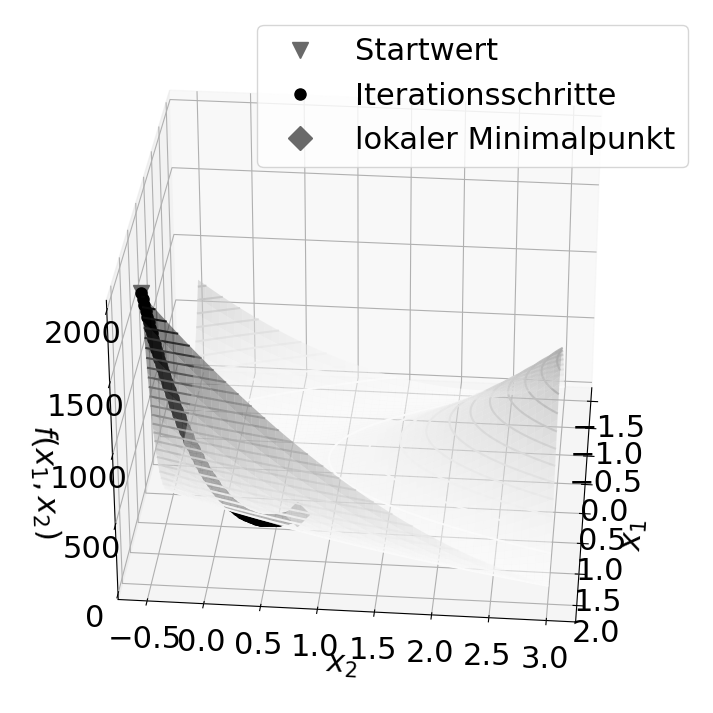

In [161]:
plot_results(f,start_x,optimal_x,optimal_y)

## Erweiterung des Bergesteigerverfahrens für zweidimensionale Probleme (8 Richtungen)

In [162]:
import numpy as np

def bergsteigerverfahren_8_directions(f, start_x, stepsize, num_steps, tol=1e-6):
    """
    Hill-Climbing-Algorithmus für 2D-Funktionen mit erweiterter Nachbarschaftssuche.
    
    Args:
        f: Zielfunktion (2D-Array -> float)
        start_x: Startpunkt als Liste oder Array
        stepsize: Schrittweite (alpha)
        num_steps: Maximale Iterationen
        
    Returns:
        x: Optimaler Punkt
        f(x): Minimaler Funktionswert
        np.array(x_history): Verlauf aller x-Werte
    """
    x = np.array(start_x, dtype=float)
    x_history = [x.copy()]
    y_history = [f(x)]

    for _ in range(num_steps):
        # Definieren aller möglichen Richtungen
        dirs = [
            np.array([stepsize, 0]),    # Rechts
            np.array([-stepsize, 0]),   # Links
            np.array([0, stepsize]),    # Oben
            np.array([0, -stepsize]),   # Unten
            np.array([stepsize/2, stepsize/2]),   # Diagonal rechts oben
            np.array([stepsize/2, -stepsize/2]),  # Diagonal rechts unten
            np.array([-stepsize/2, stepsize/2]),  # Diagonal links oben
            np.array([-stepsize/2, -stepsize/2])  # Diagonal links unten
        ]
        
        # Generiere alle Kandidatenpunkte
        candidates = [x + direction for direction in dirs] + [x.copy()]
        
        # Finde den Punkt mit dem kleinsten Funktionswert
        best_candidate = min(candidates, key=lambda p: f(p))
        
        # Abbruchbedingung bei fehlender Verbesserung
        if f(best_candidate) >= f(x):
            break
            
        x = best_candidate
        x_history.append(x.copy())
        y_history.append(f(x))

    # Ausgabe der Ergebnisse
    print("Optimales x:", x)
    print("Minimalwert von f(x):", f(x))
    print("Anzahl Iterationsschritte:", len(x_history)-1)  # -1 wegen Startpunkt
    
    return x, f(x), np.array(x_history)


In [163]:
optimal_x, optimal_y, iterations = bergsteigerverfahren_8_directions(f, start_x, stepsize, num_steps)


Optimales x: [0.77 0.59]
Minimalwert von f(x): 0.05374099999999916
Anzahl Iterationsschritte: 285


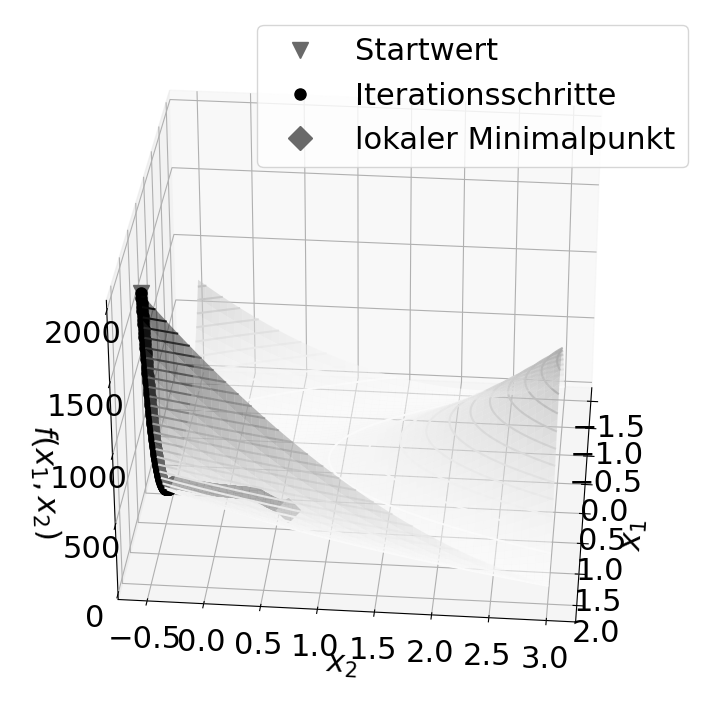

In [164]:
plot_results(f,start_x,optimal_x,optimal_y)

## Das Gradientenverfahren

Achtung: läuft nur durch wenn die Schrittweite ausreichend klein ist!

z.B. stepsize = 0.0001

In [170]:
# Gradientenabstieg-Algorithmus
def gradient_descent(f, grad_f, start_x, stepsize, num_steps, tol=1e-6):
    x = start_x
    iterations = [x]
    
    for i in range(num_steps):
        grad = grad_f(x)
        new_x = x - stepsize * grad
        
        iterations.append(new_x)
        
        # Abbruchbedingung, wenn die Änderung klein ist
        if np.linalg.norm(new_x - x) < tol:
            break
        
        if np.linalg.norm(f(new_x) - f(x)) < tol:
            break
        
        x = new_x
        
        print(i, np.linalg.norm(grad))
    
    # Gib das Ergebnis aus
    print("Optimales x:", x)
    print("Minimalwert von f(x):", f(x))
    print("Anzahl Iterationsschritte:", len(np.array(iterations)))   
    
    len(iterations)
    return np.array(iterations), x, f(x)

# Gradientenabstieg durchführen
iterations, optimal_x, optimal_y = gradient_descent(f, grad_f, start_x, stepsize, num_steps)

0 3712.73537974362
1 2126.2751278689425
2 1467.7926772534408
3 1104.2744693640707
4 874.5622240827744
5 716.9726064458043
6 602.6238156214637
7 516.1754330879223
8 448.73144576283534
9 394.7850787745002
10 350.75041184864466
11 314.1956041486364
12 283.41556349027036
13 257.18092095477465
14 234.58400883284764
15 214.94082519574195
16 197.72664508037275
17 182.5325658184001
18 169.03547495766227
19 156.97685457032063
20 146.14754008143677
21 136.3765759536279
22 127.52294319978239
23 119.46933419137544
24 112.11740943742468
25 105.38414216480437
26 99.19897162213496
27 93.50156471983478
28 88.24004024884957
29 83.36954838389342
30 78.85112561215037
31 74.65076503450116
32 70.7386564459629
33 67.0885612692198
34 63.677295361736306
35 60.484298691214306
36 57.491275404333415
37 54.68189127670911
38 52.04151819943609
39 49.5570174270319
40 47.21655492806152
41 45.009443450509714
42 42.92600691911572
43 40.9574635815441
44 39.095824959965896
45 37.333808179055836
46 35.66475965718293
47 34

### Plotten der Funktion und der Iterationsschritte
Die Iterationsschritte und den Funktionsgraphen werden im Folgenden grafisch dargestellt.

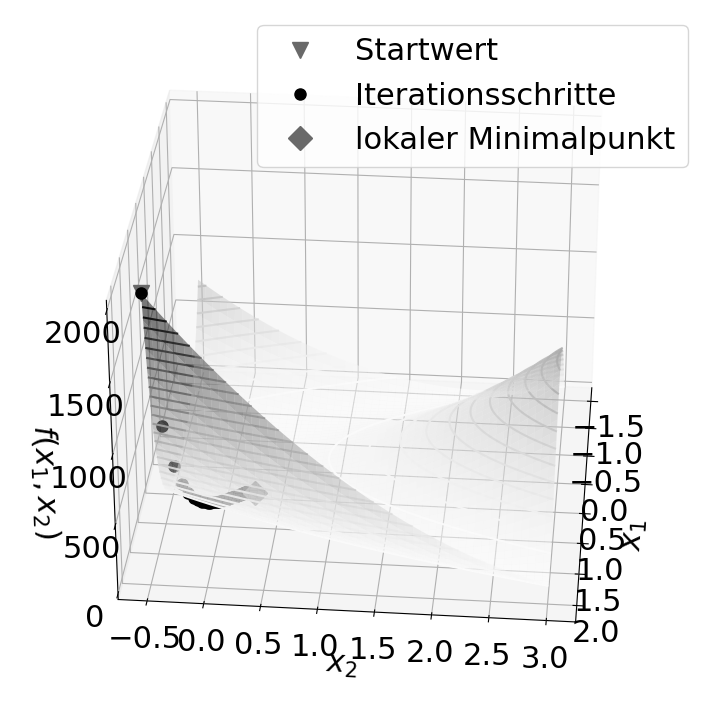

In [171]:
plot_results(f,start_x,optimal_x,optimal_y)